### Notebook structure

- **Instructions**: set of important informations to understand the structure of the code and how to make it work.
- **Excercise 01.1**: computing an integral using RNG .
- **Excercise 01.2**: sampling data with different probability distribution end testing the central limit theorem.
- **Excercise 01.3**: estimating $\pi$ by simulating Buffon's experiment.


## Instructions

Intruction to C++ compilation and executions .

- To compile the code run in the directory 'es_01.1', 'es_01.2' and 'es_02.3' the command :  `make`. 
- The code is divided into directories:
    - the directory 'random' contains all the files needed to use the RNG.
    - the directory 'utilities' contains files with userful functions and classes.
- To clear the files `.o`  and the executable please run `make clean`.
- The code generates output files in the  'output' directory.

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from astropy import table
from astropy.io import ascii


import seaborn as sns  # Import Seaborn for enhancing data visualizations
sns.set_theme(style='whitegrid', palette='pastel')  # Set Seaborn theme and color palette


## Exercise 01.1

### 1. 
For the fist section of the excercise we use a Pseudo Random Number Generator to estimate the following integral:
$$
\langle r \rangle = \int_0^1 r dr = 1/2.
$$


The program calculates the cumulative means and their corresponding uncertainties of a sequence of random numbers. This sequence is divided into N blocks. For each block, L random numbers ranging between 0 and 1 are generated using a random number generator following the random New York University (RANNYU) routine implemented by Kalos and Panoff. Subsequently, the mean of the random numbers within each block is calculated, and this result is used to obtain a cumulative mean across the various blocks.

Progressive uncertainty is computed by leveraging the division of the sequence into blocks. By evaluating the means $A_i$ and the squared means $A_i^2$ over an increasing number of blocks, it's possible to calculate the uncertainty using the following formula:

$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
​
The results of cumulative means and progressive uncertainties are then stored in the file "es01_1_1.dat". Finally, the data is read from the file and plotted on a graph as a function of the number of blocks. This allows us to observe how the mean and uncertainty change as the number of blocks increases and, consequently, the total number of random numbers used in the analysis.

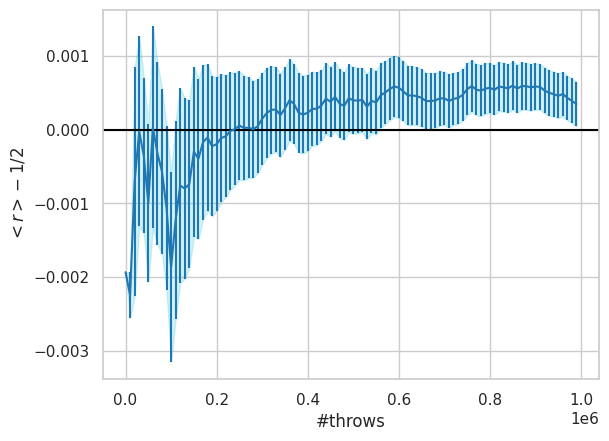

In [16]:

N = 100     # Number of blocks
L = 10000   # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)  # Create an array of indices [0,1,2,...,N-1]

# Read the data from the file 'es01_1_2.dat' using Astropy's ascii module
df = ascii.read('es_01.1/output/es01_1_1.dat')

# Extract the 'comulative_averages' and 'uncertainty' columns from the data
ave = df['comulative_averages']
yerr = df['uncertainty']

# Calculate the total number of throws for each block
x *= L  # Number of throws = block * Number of throws in each block (x)

# Plotting with error bars and shaded uncertainty region
plt.errorbar(x, ave - 1/2, yerr, color="tab:blue", ecolor="tab:blue")
plt.fill_between(x, ave - 1/2 - yerr, ave - 1/2 +
                 yerr, alpha=0.2, color="tab:cyan")

# Adding labels, grid, and reference line
plt.xlabel('#throws')
plt.ylabel('$<r>-{1}/{2}$')
plt.grid(True)
plt.axhline(y=0., color="black", linestyle='-')

# Display the plot
plt.show()


### 2.
 In this section the goal is to use the same tecnique as the previous one, but to evaluate $\sigma^2$ given by the espression:

$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12.$$



Similarly to the previous section, cumulative means and their corresponding uncertainties are calculated, but this time based on the squared differences from 0.5 for each random number. The results (cumulative mean and uncertainty) are written to another output file, "es01_1_2", then read and graphically represented.

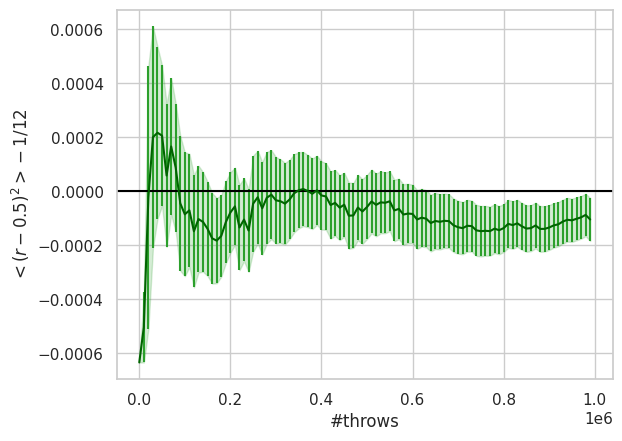

In [17]:

N = 100     # Number of blocks
L = 10000   # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)  # Create an array of indices [0,1,2,...,N-1]

# Read the data from the file 'es01_1_2.dat' using Astropy's ascii module
df = ascii.read('es_01.1/output/es01_1_2.dat')

# Extract the 'comulative_averages' and 'uncertainty' columns from the data
ave = df['comulative_averages']
yerr = df['uncertainty']

# Calculate the total number of throws for each block
x *= L  # Number of throws = block * Number of throws in each block (x)

# Plotting with error bars and shaded uncertainty region
plt.errorbar(x, ave - 1/12, yerr, color="darkgreen", ecolor="tab:green")
plt.fill_between(x, ave - 1/12 - yerr, ave - 1/12 +
                 yerr, alpha=0.2, color="tab:green")

# Adding labels, grid, and reference line
plt.xlabel('#throws')
plt.ylabel('$<(r-0.5)^2>-{1}/{12}$')
plt.grid(True)
plt.axhline(y=0., color="black", linestyle='-')

# Display the plot
plt.show()


### 3.
 Now a chi-squared test is performed to verify that the distribution of the generated random numbers is indeed uniform.

The process is iterated 100 times, each time generating $10^4$ random numbers and recording their distribution into blocks.
The observed frequencies of the random numbers falling into each block are stored.
The chi-squared test statistic is calculated by comparing the observed frequencies with the expected frequencies based on a uniform distribution assumption.
The calculated chi-squared values are written to the output file "es01_1_3.dat". Subsequently, the results are plotted as a function of the number of iterations.

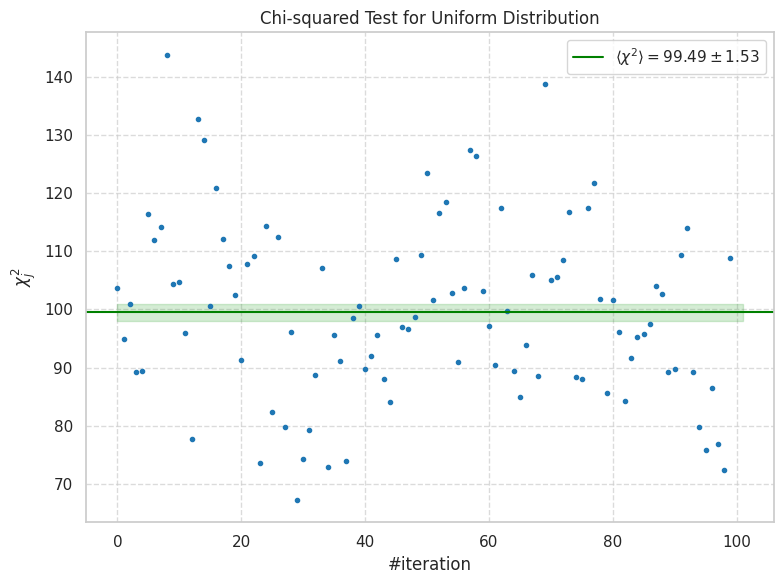

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

# Read the data from the file 'es01_1_3.dat'
df = ascii.read('es_01.1/output/es01_1_3.dat')
chi = df['Chi']  # Extracting the 'Chi' column from the data
L = len(chi)     # Number of evaluations (length of the 'chi' array)
x = np.arange(L)  # Create an array of indices from 0 to L-1

# Plotting the chi-squared values against the number of iterations
plt.figure(figsize=(8, 6))  # Set a custom figure size
plt.plot(x, chi, '.', color='tab:blue')
plt.xlabel('#iteration')
plt.ylabel('$\chi_j^2$')
# Add grid with dashed lines and lower opacity
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate the mean and standard error of the mean for the chi-squared values
chiMean = np.mean(chi)
chiStd = np.std(chi, ddof=1) / np.sqrt(L - 1)

# Plotting the mean and uncertainty as a red line with shaded region
plt.axhline(y=chiMean, color="green",
            label=fr"$\langle \chi^2 \rangle = {chiMean:.2f} \pm {chiStd:.2f}$", linewidth=1.5)
plt.fill_between(range(102), chiMean - chiStd, chiMean +
                 chiStd, color="tab:green", alpha=0.2)

plt.title("Chi-squared Test for Uniform Distribution")
plt.legend()
plt.tight_layout()  # Improve spacing between subplots and labels
plt.show()


We now want to check whereas the measures of $\Chi^2$ obtained from the simulation are distributed along the true probability distribution function
$$
p(x)=N x^{\frac k2 -1}e^{-\frac x2},
$$
where $k$ indicates the degrees of freedom of the distribution. 

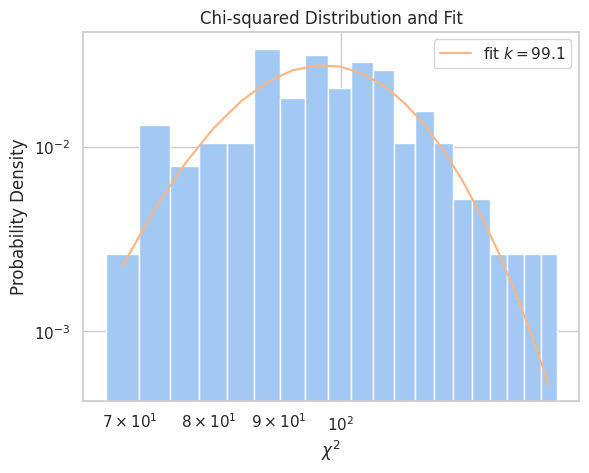

In [19]:
from scipy.optimize import curve_fit

# create a histogram with the sampled chi-squared
n, bins, patches = plt.hist(chi, bins=20, density=True)

# Defining the true chi-squared probability distribution function


def chi_squared_pdf(x, N, k):
    return N * np.exp(-x/2) * x**(k/2-1)


# Calculate the center of each bin
bin_centers = (bins[1:] + bins[:-1]) / 2

# Fit the histogram to the chi-squared function
popt, pcov = curve_fit(chi_squared_pdf, bin_centers, n, p0=[0, 100])

# Plot the fitted chi-squared curve
plt.xlabel(r'$\chi^2$')
plt.ylabel(r"probability")
plt.plot(bin_centers, chi_squared_pdf(bin_centers, *popt),
         label=fr"fit $k={popt[1]:1.1f}$")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\chi^2$')
plt.ylabel('Probability Density')
plt.title('Chi-squared Distribution and Fit')
plt.legend()

plt.show()


## Exercise 01.2

We now implement two new probability distributions, to do so we use the method of the inversion of the cumulative distribution. The distributions mean to sample a simple exponential 
$$
p(x)=\lambda e^{-\lambda x} \qquad x\in[0,+\infty)
$$
and a Cauchy-Lorentz pdf
$$
p(x)=\frac 1\pi\frac{\Gamma}{(x-\mu)^2+\Gamma^2}\qquad x\in(-\infty,+\infty).
$$


The inversion method uses the cumulative distribution function (CDF) of a desired distribution to generate random numbers. It works by inverting the CDF mathematically, allowing you to transform uniform random numbers into numbers that follow the desired distribution. This method is effective for distributions with easily invertible CDFs.

For the previously mentioned distribution the inverted function is particularli easy. For the exponential
$$
x=-\frac 1\lambda\ln(1-y)
$$
and for the Cauchy-Lorentz
$$
x=\Gamma \tan\left[\pi\left(y-\frac12\right)\right],
$$
where the variable $x$ followes the desired distribution, whereas $y$ is generated uniformally in $[0,1)$. First we plot the resulted distributions for $10^4$ throws.

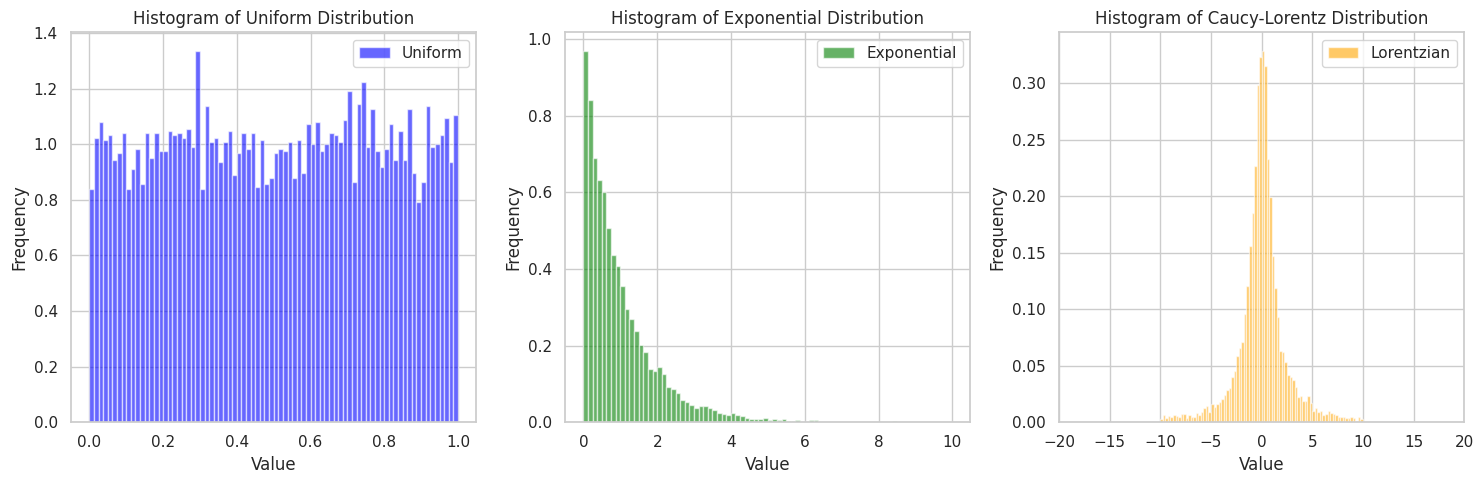

In [20]:
# Read the data from the file 'es01_1_3.dat'
df = ascii.read('es_01.2/output/es01_2_1.dat')
unif = df["uniforme"]
expo = df['exponenziale']
lore = df['lorentziana']


plt.figure(figsize=(15, 5))

# Histogram for Uniform distribution
plt.subplot(131)
n, bins, patches = plt.hist(
    unif, alpha=0.6, bins=80, density=True, color='blue', label='Uniform')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Uniform Distribution')
plt.legend()

# Histogram for Exponential distribution
plt.subplot(132)
n, bins, patches = plt.hist(
    expo, alpha=0.6, bins=80, density=True, color='green', label='Exponential')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Exponential Distribution')
plt.legend()

# Histogram for Third distribution (e.g., Lorentzian)
plt.subplot(133)
# Replace 'lore' with your actual list for the third distribution
n, bins, patches = plt.hist(lore, alpha=0.6, bins=80, density=True,
                            range=[-10, 10], color='orange', label='Lorentzian')
plt.xlim(-20, 20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Caucy-Lorentz Distribution')
plt.legend()

plt.tight_layout()
plt.show()


The Central Limit Theorem (CLT) is a  a fundamental concept of statistics and probability theory. It states that when independent random variables are summed, as long as they possess finite first and second moments, their appropriately normalized sum will tend towards a normal distribution (Gaussian), regardless of the initial distribution of these variables. However, it's important to note that this convergence is not assured for all distributions. For instance, the Cauchy-Lorentz distribution, characterized by heavy tails and the absence of finite mean and variance, doesn't conform to a normal distribution under the CLT. Instead, it retains its Cauchy-Lorentz distribution characteristics.

To empirically investigate the Central Limit Theorem, we'll examine three distinct distributions: uniform, exponential, and Cauchy-Lorentz. Our goal is to analyze how the sample means from these distributions behave as we progressively increase the sample size.

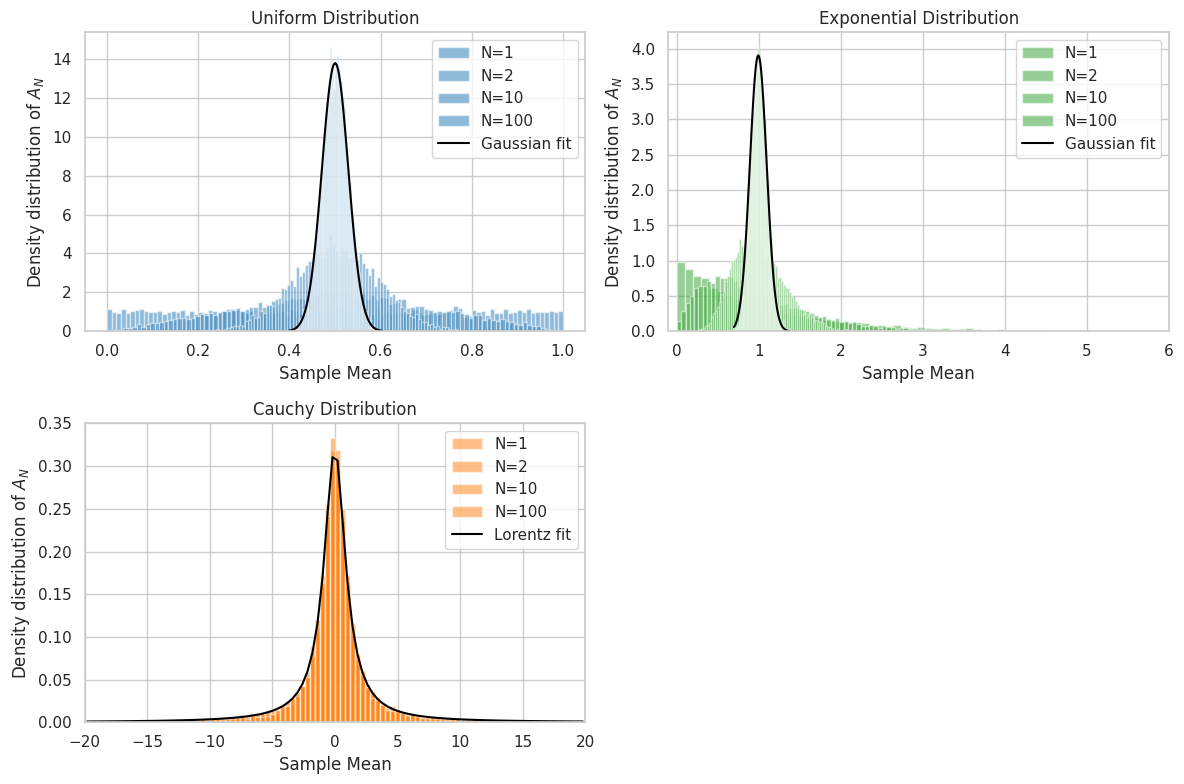

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the experiment
sample_sizes = [1, 2, 10, 100]  # Different sample sizes to test
bin_count = 100  # Number of bins for histogram

dfu = ascii.read('es_01.2/output/es01_2_2a.dat')
dfe = ascii.read('es_01.2/output/es01_2_2b.dat')
dfl = ascii.read('es_01.2/output/es01_2_2c.dat')

# Distributions to test
distributions = ['uniform', 'exponential', 'cauchy']
labels = ['Uniform', 'Exponential', 'Cauchy']
colors = ['tab:blue', 'tab:green', 'tab:orange']


def lorentzian(x, amplitude, gamma, mu):
    return amplitude * gamma/(gamma**2+(x-mu)**2)

# Define the Gaussian function


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2)


# Plot settings
plt.figure(figsize=(12, 8))

# Loop through each distribution
for i, distribution in enumerate(distributions):
    plt.subplot(2, 2, i + 1)

    for size in sample_sizes:
        if distribution == 'uniform':
            n, bins, patches = plt.hist(dfu["N="+str(size)],bins=bin_count, density=True,alpha=0.5, color=colors[i], label=f'N={size}')
        elif distribution == 'exponential':
            n, bins, patches = plt.hist(dfe["N="+str(size)], bins=bin_count, density=True,alpha=0.5, color=colors[i], label=f'N={size}')
            plt.xlim(-0.1,6)
        elif distribution == 'cauchy':
            n, bins, patches = plt.hist(dfl["N="+str(size)], bins=bin_count, range=[-20, 20], density=True,alpha=0.5, color=colors[i], label=f'N={size}')
            plt.xlim(-20,20)
        
    
    # Calculate the center of each bin
    bin_centers = (bins[1:] + bins[:-1]) / 2

    if distribution != 'cauchy':
        popt, pcov = curve_fit(gaussian, bin_centers, n)
        plt.plot(bin_centers, gaussian(bin_centers, *popt),color='black', label="Gaussian fit")
    
    else :
        popt, pcov = curve_fit(lorentzian, bin_centers, n)
        plt.plot(bin_centers, lorentzian(bin_centers, *popt),color='black', label="Lorentz fit")

    plt.title(f'{labels[i]} Distribution')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density distribution of $A_N$')
    plt.legend()
# Adjust spacing between subplots
plt.tight_layout()
plt.show()


## Excercice 01.3


We now want to make a practical use of the pseudo-random number generetor and estimate the value of PI sumulating Buffon’s experiment. 
The idea is to compute the progressive estimate of the value of in the blocks. The estimate in each block is obtained by throwing the needle $L$ times. The known value of $\pi$ was not used in the code to sample the needle. Two random numbers, $x$ and $y$, were drawn to calculate 

$$
\sin(\theta)=\frac{y}{x^2+y^2}
$$.

It is not necessary to use multiple lines but rather a single one is sufficient, as the problem exhibits translational invariance along the y-axis. This means that all cases can be reduced to this scenario through a translation. 

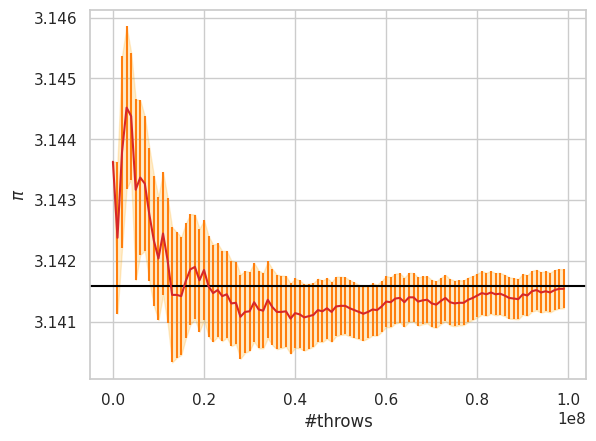

In [22]:

N = 100     # Number of blocks
L = int(1e6)   # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)  # Create an array of indices [0,1,2,...,N-1]

# Read the data from the file 'es01_1_2.dat' using Astropy's ascii module
df = ascii.read('es_01.3/output/es01_3.dat')

# Extract the 'comulative_averages' and 'uncertainty' columns from the data
ave = df['comulative_averages']
yerr = df['uncertainty']

# Calculate the total number of throws for each block
x *= L  # Number of throws = block * Number of throws in each block (x)

# Plotting with error bars and shaded uncertainty region
plt.errorbar(x, ave , yerr, color="tab:red", ecolor="tab:orange")
plt.fill_between(x, ave  - yerr, ave +
                 yerr, alpha=0.2, color="orange")

# Adding labels, grid, and reference line
plt.xlabel('#throws')
plt.ylabel('$\pi$')
plt.grid(True)
plt.axhline(y=np.pi, color="black", linestyle='-')


# Display the plot
plt.show()
